# Predictive Analytics for Retail Banking

In [93]:
# Import all required libraries for reading data, analysing and visualizing data

import numpy as np
import pandas as pd

In [94]:
# Read the training & test data
# data = pd.read_csv("bank.csv")

import types
import pandas as pd

data = pd.read_csv("C:/Users/hai/Desktop/Remote Internship 2020/data sets/bank.csv")

In [46]:
X_train

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
3864,65,2,1,2,0,2331,0,0,1,1,425,1,183,2,2
172,45,1,0,0,0,594,1,0,2,8,833,2,0,0,3
2945,34,1,2,3,0,129,1,1,0,9,295,1,200,2,2
10037,51,1,1,0,0,5050,0,1,2,6,75,7,0,0,3
2423,46,4,1,2,0,242,0,0,0,1,120,2,96,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,54,4,1,1,0,2895,1,0,0,3,20,2,256,1,0
648,30,7,1,1,0,48,1,0,0,5,662,13,0,0,3
3506,54,4,1,2,0,1624,0,0,0,8,166,3,182,10,2
10483,48,4,1,2,0,190,0,0,0,1,14,22,0,0,3


In [47]:
Y_train

3864     1
172      1
2945     1
10037    0
2423     1
        ..
10858    0
648      1
3506     1
10483    0
4851     1
Name: deposit, Length: 8929, dtype: int64

In [48]:
X_test

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
976,30,6,2,1,0,-617,0,1,0,9,925,1,0,0,3
5037,40,7,1,1,0,446,1,0,2,8,1252,1,0,0,3
5307,52,1,1,0,0,117,0,1,0,5,164,2,0,0,3
8575,44,9,1,1,0,0,1,0,2,8,243,3,0,0,3
7951,40,4,2,2,0,257,0,0,0,3,147,1,209,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,34,1,1,1,0,2595,1,1,0,0,126,1,336,2,1
3434,30,8,2,1,0,2046,0,0,1,0,595,3,254,1,0
298,42,2,2,3,0,323,0,0,2,6,617,1,0,0,3
10954,30,4,2,2,0,726,1,0,0,0,39,1,342,3,0


In [49]:
Y_test

976      1
5037     1
5307     0
8575     0
7951     0
        ..
5925     0
3434     1
298      1
10954    0
8194     0
Name: deposit, Length: 2233, dtype: int64

In [50]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
Y_pred=clf.predict(X_test)

In [52]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[1 1 0 ... 1 0 0]


In [53]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 0 ... 1 0 0]


In [54]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 




Accuracy score: 74.205105
Recall score : 70.647220
ROC score : 74.144032

[[882 254]
 [322 775]]


In [55]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

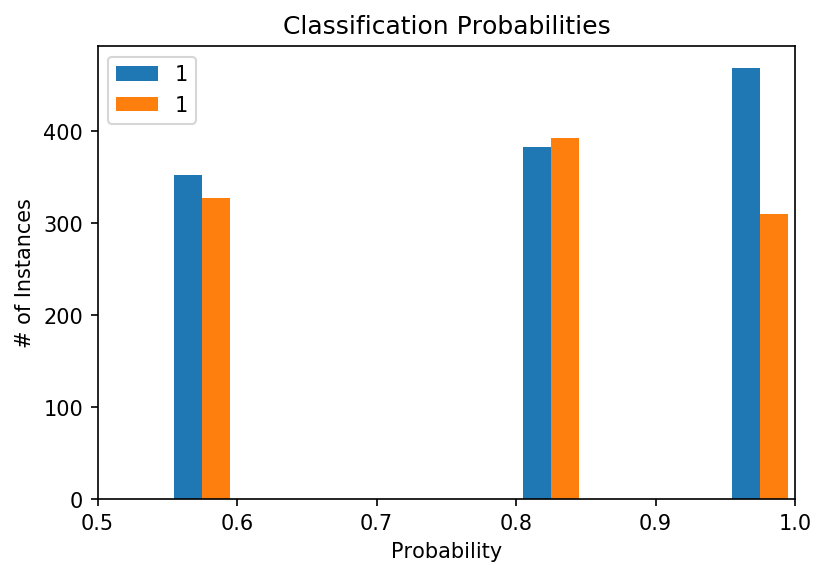

In [56]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

In [57]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [58]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [59]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [60]:
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [61]:
clf_acc

array([0.73631172, 0.74428763, 0.72916667])

#  Logistic Regression

In [68]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\Users\hai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
lr_acc

array([0.79475983, 0.79704301, 0.78461022])

In [70]:
#Predict on test data
Y_pred=lr.predict(X_test)

In [71]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[1 1 0 ... 1 0 0]


In [72]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 0 ... 1 0 0]


In [73]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 76.130766
Recall score : 70.464904
ROC score : 76.033508

[[927 209]
 [324 773]]


In [74]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# Decision Tree

In [75]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([0.77762849, 0.77856183, 0.7688172 ])

In [76]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)

In [77]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[1 1 0 ... 1 0 0]


In [78]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 0 0 ... 0 0 0]


In [79]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_dt=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 77.115987
Recall score : 75.296263
ROC score : 77.084751

[[896 240]
 [271 826]]


In [80]:
dtc_clf_acc

array([0.77762849, 0.77856183, 0.7688172 ])

# Random Forest

In [81]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)

In [82]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([0.76990259, 0.78494624, 0.74932796])

In [83]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [84]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[1 1 0 ... 1 0 0]


In [85]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 0 0 ... 0 0 0]


In [86]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 76.757725
Recall score : 69.097539
ROC score : 76.626234

[[956 180]
 [339 758]]


In [87]:
acc_rmf

76.75772503358709

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# svm

In [89]:
# Build Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

In [90]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [91]:
svc_acc

array([0.79811891, 0.80880376, 0.79502688])

In [92]:
#Predict on test data
Y_pred=svc_classifier.predict(X_test)

In [89]:
print('Actual deposit')
print(Y_test.values)

Actual deposit
[1 1 0 ... 0 0 1]


In [90]:
print('Predicted deposit')
print(Y_pred)

Predicted deposit
[0 1 0 ... 0 0 0]


In [91]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 74.205105
Recall score : 63.738318
ROC score : 73.786614

[[975 188]
 [388 682]]


AUC Score (kNN): 0.80 


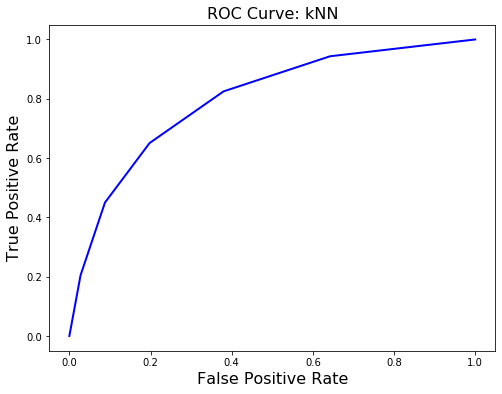

AUC Score (Logistic Regression): 0.86 


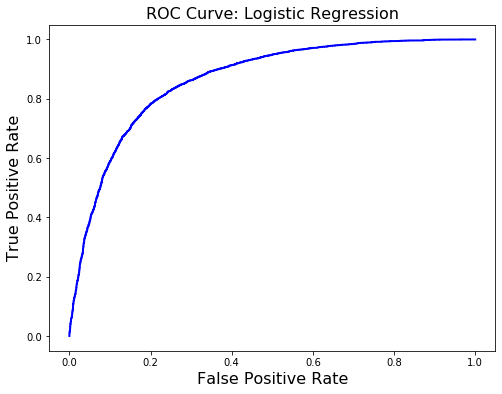

AUC Score (Support Vector Classification): 0.88 


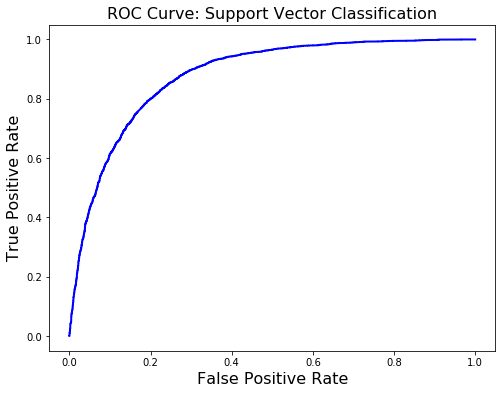

AUC Score (Decision Tree Classifier): 0.77 


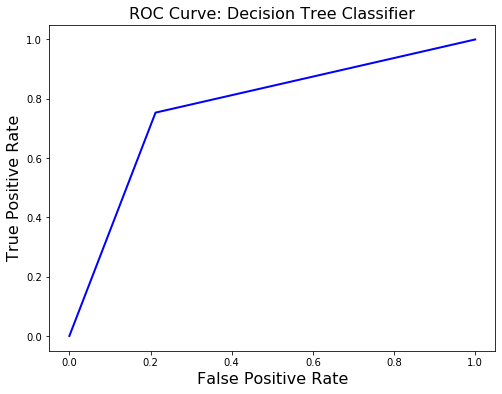

AUC Score (Random Forest Classifier): 0.85 


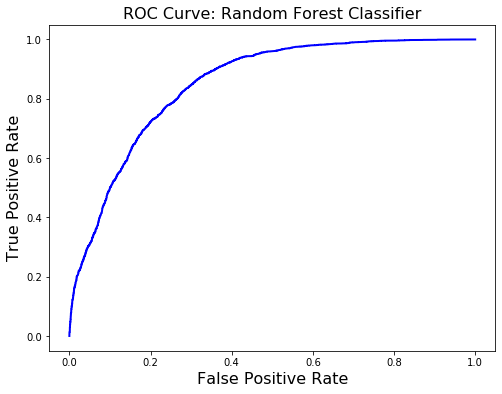

In [92]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)